In [1]:
###################### 주택 가격 예측
# LinearRegression 클래스 : RSS를 최소화해 Ordinary Least Squares 추정 방식으로 구현한 클래스
# class sklearn.linear_model_LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
# fit_intercept: 절편 값을 계산할지 말지

# 다중 공선성: 피처 간의 상관관계가 높을 때 (OLS 기반은 입력 피처의 독립성에 많은 영향)

# 회귀 평가지표: MAE, MSE, RMSE, R^2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


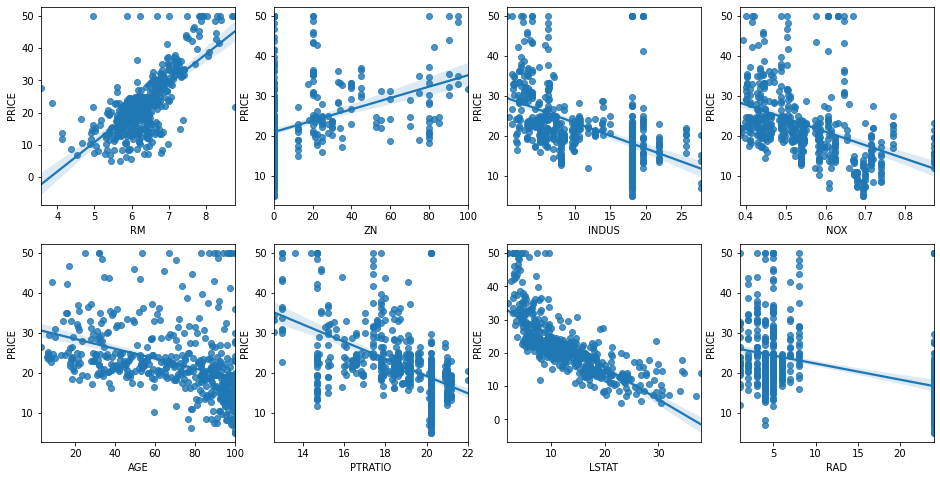

In [2]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
    # regplot: 산점도와 선형 회귀 직선을 함께 표현
    # RM과 LSTAT가 가격의 영향도 뚜렷하게 나타남

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1,inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size = 0.3, random_state =156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test, y_preds))

17.29691590790215 4.158956107955715
0.7572263323138921


In [4]:
print(lr.intercept_)
print(np.round(lr.coef_,1))

40.995595172164336
[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [5]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [6]:
# cross_val_score 통해 MSE, RMSE 측정해보기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(avg_rmse)

[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.828658946215808
